<a href="https://colab.research.google.com/github/dauvannam321/ReadingList/blob/main/DenseNet/DenseNet_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.applications.densenet import DenseNet121
model = DenseNet121(weights='imagenet')


33188688/33188688 [==============================] - 0s 0us/step


##**Model architecture**

In [2]:
model.summary()

Model: "densenet121"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                        

##**Classify on unseen image**

In [3]:
import cv2
import numpy as np
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications.imagenet_utils import preprocess_input

In [8]:
import requests

url = 'https://github.com/EliSchwartz/imagenet-sample-images/blob/master/n03637318_lampshade.JPEG?raw=true'
img_data = requests.get(url).content
with open('n03637318_lampshade.JPEG', 'wb') as handler:
    handler.write(img_data)

In [39]:
import tensorflow as tf

1/1 [==============================] - 0s 48ms/step


[[('n03637318', 'lampshade', 0.37235954),
  ('n04380533', 'table_lamp', 0.18592401),
  ('n04355338', 'sundial', 0.11813958)]]

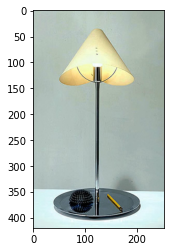

In [61]:
#@title Predict on new image
img_path = "/content/n03637318_lampshade.JPEG"#@param {type:"string"} 

img = cv2.imread(img_path)
cvt_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
imshow(cvt_img)
resize_img = cv2.resize(cvt_img, (224, 224))
x = np.expand_dims(img, axis=0)
x = preprocess_input(x)

preds=model.predict(x)
# print("predicted class: ", preds )    # probabilities for being in each of the 1000 classes
decode_predictions(preds,top=3)  #  # probabilities for being in top of the 3 classes